## What book should we launch a marketing campaign on? if so, how much would be the budget?

### PART 1 Data Analysis

1. AVG money spent per order

2. Top buyer and the book

3. Top Book and the buyer

4. Day and Hr people buy the most

5. People come back to promotions?

6. Hard vs softcovers




In [1]:
# Introduction
"""
# Data Analysis for EGW Books Collection
This notebook performs exploratory data analysis on the EGW Books Collection databases. 
It includes loading data, performing EDA, and visualizing key insights.
"""

# Setup
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database paths
DATABASE_PATH = 'dags/'
orders_db_path = f'{DATABASE_PATH}orders.db'


In [58]:
# Load data from orders database
conn_orders = sqlite3.connect(orders_db_path)
orders_df = pd.read_sql_query("SELECT * FROM orders", conn_orders)
conn_orders.close()



In [27]:
orders_df

,id,username,title,image_url,quantity,cover_type,date,time,paid,promotion,price
0,1,Gabriel,The Adventist Home,https://media4.egwwritings.org/covers/128_r.jpg,30,hardcover,2024-07-28,11:47:48,yes,no,7.99
1,2,Gabriel,The Great Controversy,https://media4.egwwritings.org/covers/132_r.jpg,100,hardcover,2024-07-28,11:47:59,yes,no,7.99
2,3,Gabriel,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1000,hardcover,2024-07-28,11:48:27,yes,no,7.99
3,4,Gabriel,The Adventist Home,https://media4.egwwritings.org/covers/128_r.jpg,1,softcover,2024-07-28,11:49:01,yes,no,7.99
4,5,Gabriel,Steps to Christ,https://media4.egwwritings.org/covers/108_r.jpg,3,hardcover,2024-07-28,11:49:13,yes,no,7.99
...,...,...,...,...,...,...,...,...,...,...,...
59,103,Yuli,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,80,hardcover,2024-08-04,16:42:00,yes,no,7.99
60,104,Estefania,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1,softcover,2024-08-04,16:42:25,yes,no,7.99
61,105,Paulina,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,60,softcover,2024-08-04,16:42:52,yes,no,7.99
62,106,Paulina,The Desire of Ages,https://media4.egwwritings.org/covers/130_r.jpg,1,hardcover,2024-08-04,16:43:17,yes,no,7.99


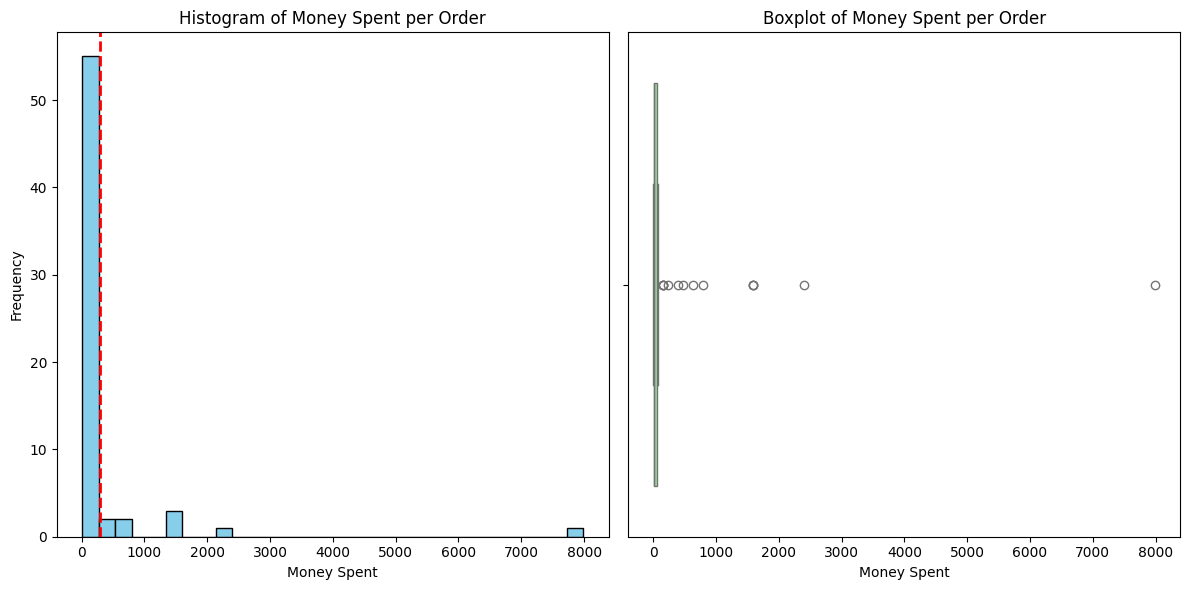

299.86140624999996

In [40]:
# Calculate the average money spent per order
orders_df['money_spent'] = orders_df['quantity'] * orders_df['price']
avg_money_spent_per_order = orders_df['money_spent'].mean()

# Plot distribution of money spent per order
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(orders_df['money_spent'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(avg_money_spent_per_order, color='red', linestyle='dashed', linewidth=2)
plt.title('Histogram of Money Spent per Order')
plt.xlabel('Money Spent')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=orders_df['money_spent'], color='lightgreen')
plt.title('Boxplot of Money Spent per Order')
plt.xlabel('Money Spent')

plt.tight_layout()
plt.show()

avg_money_spent_per_order

In [57]:
import pandas as pd

# Calculate money spent per order
orders_df['money_spent'] = orders_df['quantity'] * orders_df['price']

# Group by username to calculate total spending, average spending, total quantity
grouped = orders_df.groupby('username').agg(
    total_spent=pd.NamedAgg(column='money_spent', aggfunc='sum'),
    avg_spent=pd.NamedAgg(column='money_spent', aggfunc='mean'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum')
).reset_index()

# Calculate total spent and total quantity for percentage calculations
total_spent_all = orders_df['money_spent'].sum()
total_quantity_all = orders_df['quantity'].sum()

# Add percentage columns
grouped['percentage_spent'] = grouped['total_spent'] / total_spent_all * 100

# Determine most bought book for each user by calculating total quantity per book
most_bought_books = orders_df.groupby(['username', 'title'])['quantity'].sum().reset_index()
most_bought_books = most_bought_books.loc[most_bought_books.groupby('username')['quantity'].idxmax()]

# Merge to include most bought book details in the grouped DataFrame
grouped = pd.merge(grouped, most_bought_books[['username', 'title']], on='username', how='left')
grouped.rename(columns={'title': 'most_bought_book'}, inplace=True)

# Sort by total spent to find top buyers
grouped = grouped.sort_values(by='total_spent', ascending=False)

# Display the top buyers and their details
top_buyers_summary = grouped[['username', 'most_bought_book', 'total_quantity', 'total_spent', 'percentage_spent', 'avg_spent']]

# Print top buyers summary
top_buyers_summary



,username,most_bought_book,total_quantity,total_spent,percentage_spent,avg_spent
1,Gabriel,The Desire of Ages,1157,9242.03,48.157821,486.422632
7,laura,Letters to Young Lovers,913,7268.47,37.874112,908.558750
6,Yuli,The Desire of Ages,102,814.98,4.246649,203.745000
3,Luke,Prophets and Kings,74,581.66,3.030879,72.707500
4,Paulina,The Desire of Ages,67,535.33,2.789466,133.832500
5,Praveen,The Great Controversy,54,429.06,2.235720,85.812000
0,Estefania,The Desire of Ages,32,255.68,1.332282,31.960000
2,Juan,The Acts of the Apostles,8,63.92,0.333071,7.990000


C:\Users\gabri\AppData\Local\Temp\ipykernel_22448\1232139399.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_buyer_book_quantities['title'], x=top_buyer_book_quantities['quantity'], palette='viridis')


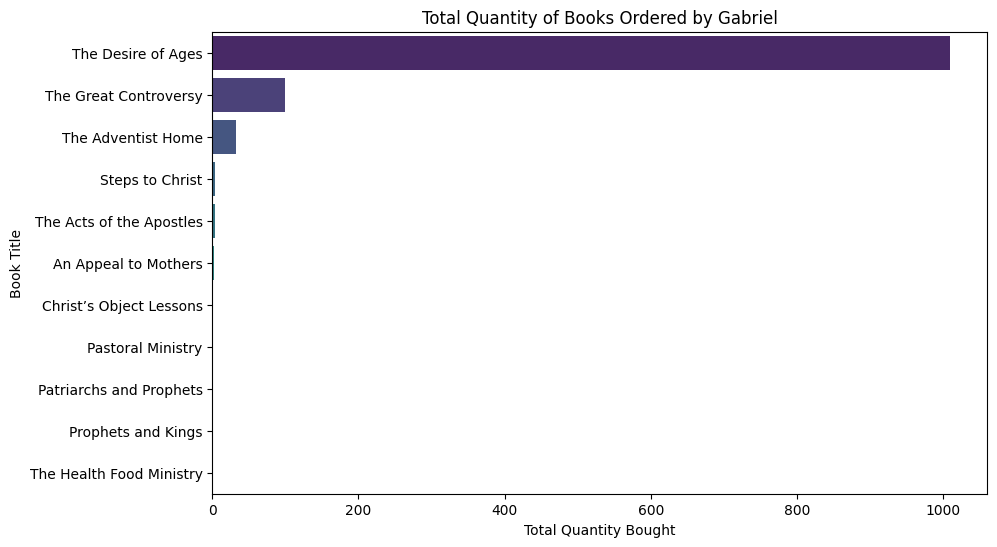

('Gabriel',
 title       The Desire of Ages
 quantity                  1010
 Name: 8, dtype: object)

In [56]:
# Identify the top buyer
top_buyer = orders_df['username'].value_counts().idxmax()

# Filter orders for the top buyer
top_buyer_orders = orders_df[orders_df['username'] == top_buyer]

# Aggregate the total quantity bought for each book
top_buyer_book_quantities = top_buyer_orders.groupby('title')['quantity'].sum().reset_index()

# Sort the DataFrame in descending order based on total quantity bought
top_buyer_book_quantities = top_buyer_book_quantities.sort_values(by='quantity', ascending=False)

# Find the most bought book by the top buyer
top_book_by_top_buyer = top_buyer_book_quantities.iloc[0]

# Plot the total quantity bought by the top buyer for each book
plt.figure(figsize=(10, 6))
sns.barplot(y=top_buyer_book_quantities['title'], x=top_buyer_book_quantities['quantity'], palette='viridis')
plt.title(f'Total Quantity of Books Ordered by {top_buyer}')
plt.xlabel('Total Quantity Bought')
plt.ylabel('Book Title')
plt.show()

top_buyer, top_book_by_top_buyer



In [53]:
# Calculate total quantity per book
book_quantity = orders_df.groupby('title')['quantity'].sum().sort_values(ascending=False).reset_index()

# Print the most bought books
print("Most Bought Books:")
print(book_quantity)

# Identify the most bought book
top_book = book_quantity['title'].iloc[0]
top_book_orders = orders_df[orders_df['title'] == top_book]


Most Bought Books:
                                 title  quantity
0                   The Desire of Ages      1168
1              Letters to Young Lovers       300
2       The Spirit of Prophecy, vol. 4       200
3   Testimonies for the Church, vol. 9       200
4                               Heaven       200
5                The Great Controversy       176
6                   The Adventist Home        38
7                      Steps to Christ        24
8                   Prophets and Kings        21
9                     Daughters of God        20
10             Christ’s Object Lessons        14
11            The Acts of the Apostles         9
12             The Ministry of Healing         7
13            The Health Food Ministry         6
14          Counsels on Diet and Foods         5
15                  Counsels on Health         5
16                An Appeal to Mothers         4
17              The Impending Conflict         2
18                   Pastoral Ministry         1
1

C:\Users\gabri\AppData\Local\Temp\ipykernel_22448\3568437779.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_book_buyer_quantities['username'], x=top_book_buyer_quantities['quantity'], palette='viridis')


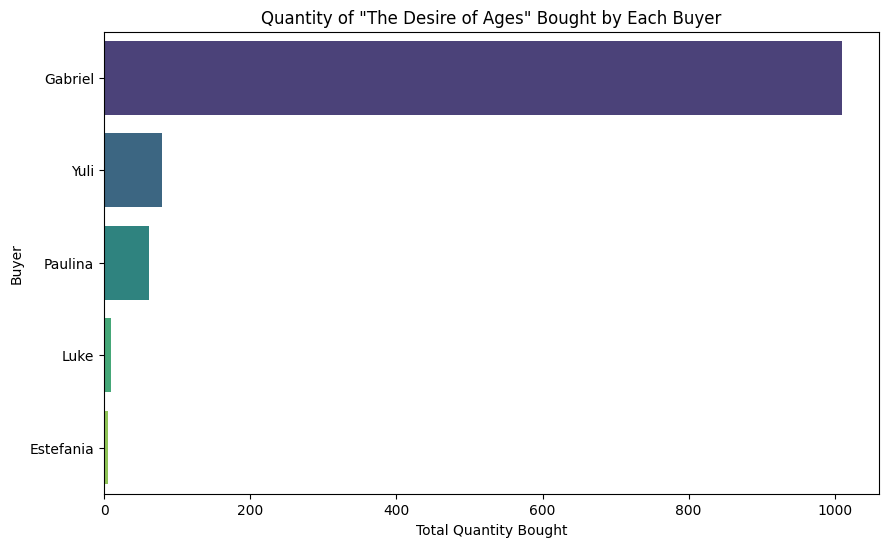

('The Desire of Ages',
 username    Gabriel
 quantity       1010
 Name: 1, dtype: object)

In [55]:
# Identify the most bought book
top_book = orders_df['title'].value_counts().idxmax()

# Filter orders for the top book
top_book_orders = orders_df[orders_df['title'] == top_book]

# Aggregate the total quantity bought by each buyer for the top book
top_book_buyer_quantities = top_book_orders.groupby('username')['quantity'].sum().reset_index()

# Sort the DataFrame in descending order based on total quantity bought
top_book_buyer_quantities = top_book_buyer_quantities.sort_values(by='quantity', ascending=False)

# Find the top buyer by total quantity
top_buyer_by_top_book = top_book_buyer_quantities.iloc[0]

# Plot the total quantity bought by each buyer for the top book
plt.figure(figsize=(10, 6))
sns.barplot(y=top_book_buyer_quantities['username'], x=top_book_buyer_quantities['quantity'], palette='viridis')
plt.title(f'Quantity of "{top_book}" Bought by Each Buyer')
plt.xlabel('Total Quantity Bought')
plt.ylabel('Buyer')
plt.show()

top_book, top_buyer_by_top_book


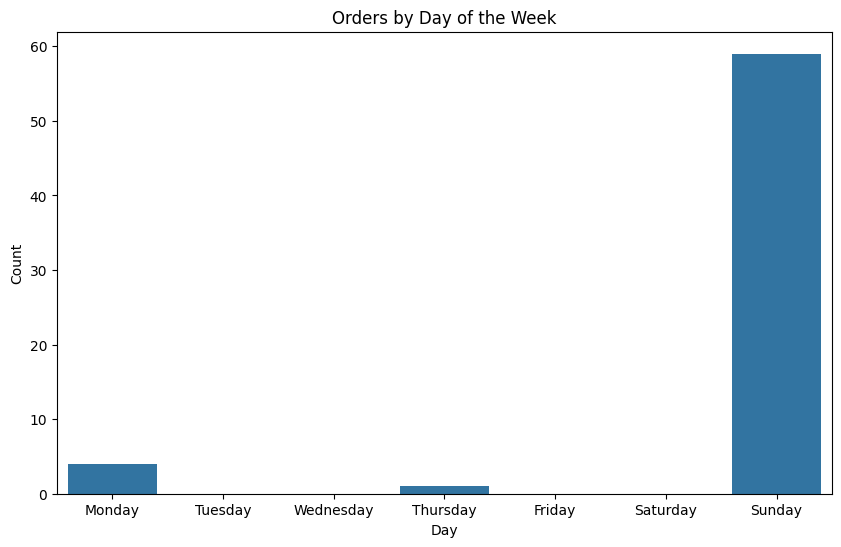

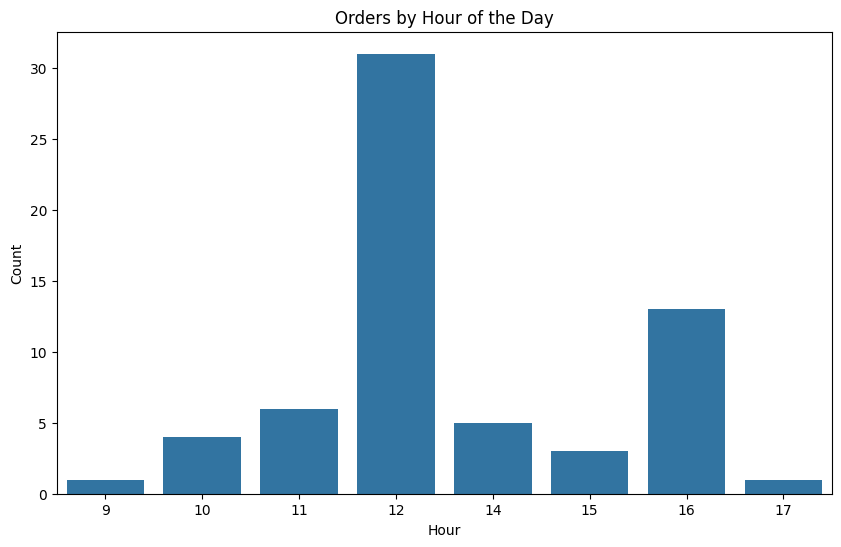

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


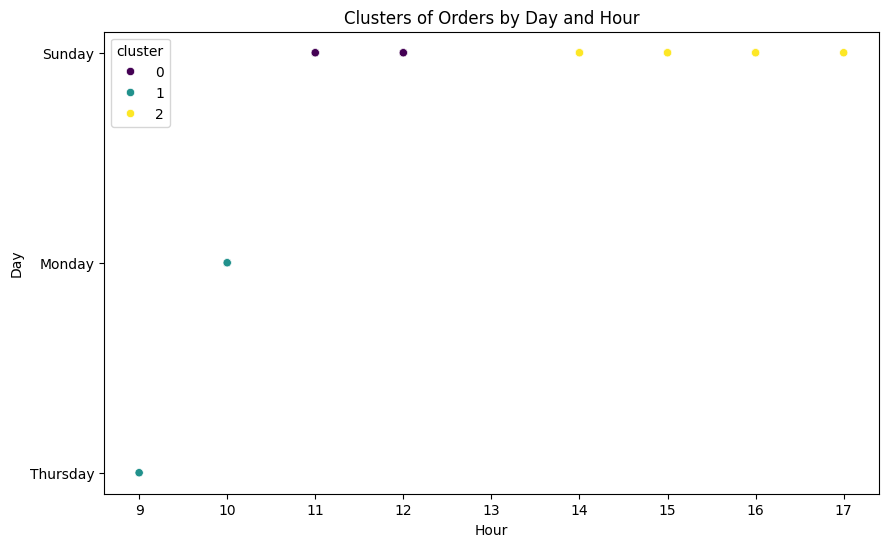

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np


conn_orders = sqlite3.connect(orders_db_path)
orders_df_2 = pd.read_sql_query("SELECT * FROM orders", conn_orders)
conn_orders.close()

# Ensure 'date' column is in datetime format
orders_df_2['date'] = pd.to_datetime(orders_df_2['date'])

# Extract day and hour from the datetime
orders_df_2['day'] = orders_df_2['date'].dt.day_name()
orders_df_2['hour'] = pd.to_datetime(orders_df_2['time'], format='%H:%M:%S').dt.hour

# Plot day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x=orders_df_2['day'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Orders by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

# Plot hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x=orders_df_2['hour'])
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Cluster analysis
X = orders_df_2[['hour', 'day']].copy()
X['day'] = X['day'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
orders_df_2['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders_df, x='hour', y='day', hue='cluster', palette='viridis')
plt.title('Clusters of Orders by Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()



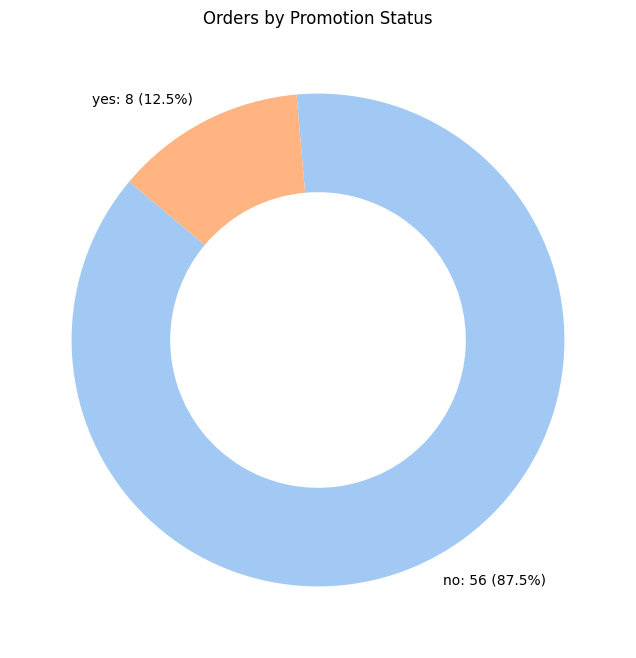

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is in datetime format
orders_df['date'] = pd.to_datetime(orders_df['date'])

# Update promotion status based on price
orders_df['promotion'] = np.where(orders_df['price'] < 7.99, 'yes', 'no')

# Calculate counts and percentages for each promotion status
promotion_counts = orders_df['promotion'].value_counts()
promotion_percentages = orders_df['promotion'].value_counts(normalize=True) * 100

# Define labels with both actual values and percentages
labels = [f'{label}: {count} ({percentage:.1f}%)' for label, count, percentage in zip(promotion_counts.index, promotion_counts, promotion_percentages)]

# Plot donut chart
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(promotion_counts, labels=labels, startangle=140, colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.4))

plt.title('Orders by Promotion Status')
plt.show()


People dont usually come back for promotions, maybe we need to improve our after sale customer service

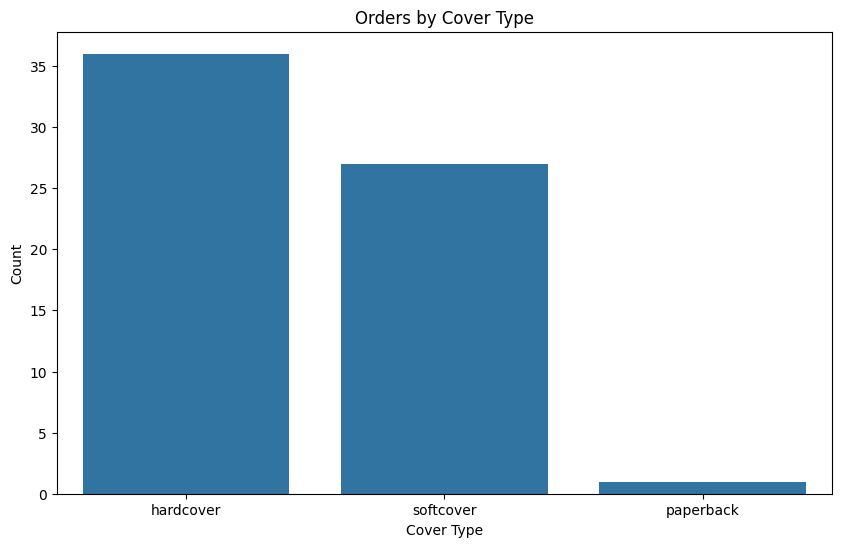

cover_type
hardcover    36
softcover    27
paperback     1
Name: count, dtype: int64

In [33]:
# Plot hardcover vs softcover
cover_type_counts = orders_df['cover_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x=orders_df['cover_type'], order=cover_type_counts.index)
plt.title('Orders by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

cover_type_counts


### Conclusion
Based on the data analysis, it is evident that launching a targeted marketing campaign could be highly beneficial. The analysis reveals that "The Desire of Ages" is our top-selling book, with significant interest and purchases across our customer base. Furthermore, Sundays at 12 PM have shown to be peak times for purchases, indicating a prime opportunity for engagement.

Given this information, we recommend launching a focused marketing campaign on social media and other channels specifically on Sundays at 12 PM. This campaign should highlight "The Desire of Ages" to leverage its strong sales performance. Additionally, it would be strategic to promote the hardcover editions, as inventory levels for these are currently higher, ensuring that we can meet anticipated demand and optimize sales.

Budget: less than 299$ (AVG sale)